In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
df = pd.read_csv('/Users/shaguntembhurne/chatbot/store management/MACHINE-LEARNING-ML/TITANIC/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [138]:
df.info()
# FROM THIS WE CAN CONCLUDE THAT AGE IS MISSING IN MANY PASSENGERS 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


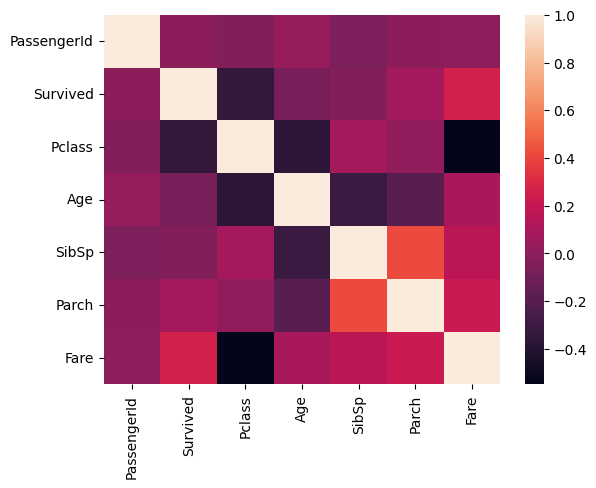

In [139]:
sns.heatmap(df.corr(numeric_only= True))
plt.show()

<Axes: >

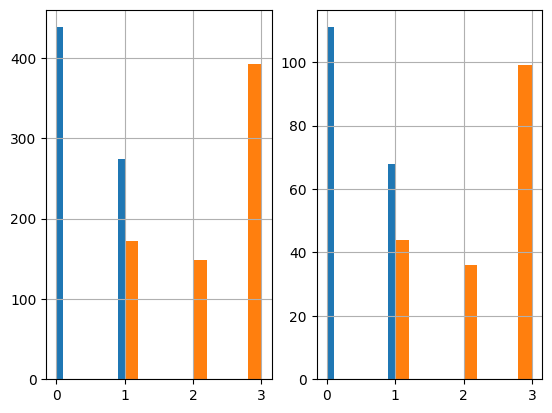

In [140]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(df,df[['Survived','Sex','Pclass']]):
    strat_train_set = df.loc[train_indices]
    strat_test_set = df.loc[test_indices]

#for representation 
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

In [141]:
df.info()
#let's fix the age null values 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
class AgeImputer(BaseEstimator,TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        imputer = SimpleImputer(strategy='mean')
        X['Age'] = imputer.fit_transform(X[['Age']])
        return 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [142]:
# LET'S DO SOME MORE PREPROCESSING AND ENCODE ALL THE DATA OF SEX EMBARKED AND CONVERT IT TO BINARY (ONE HOT ENCODER)
from sklearn.preprocessing import OneHotEncoder
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self,X,y = None):
        return self 
    def transform(self, X):
        encoder = OneHotEncoder(sparse=False)

        matrix_embarked = encoder.fit_transform(X[['Embarked']]).toarray()
        column_names = ['C','Q','S']
        for i in range(len(matrix_embarked.T)):
            X[column_names[i]] = matrix_embarked.T[i]


        matrix_sex = encoder.fit_transform(X[['Sex']]).toarray()
        column_names= ['Male','Female']
        for i in range (len(matrix_sex.T)):
            X[column_names[i]]= matrix_sex.T[i]
        return X

In [143]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self 
    
    def transform(self, X):
        if X is None:
            raise ValueError("Input data X is None")
        
        columns_to_drop = ['Embarked', 'Sex', 'Name', 'Ticket', 'Cabin', 'N']
        
        missing_columns = [col for col in columns_to_drop if col not in X.columns]
        if missing_columns:
            raise ValueError(f"Columns missing in input data: {missing_columns}")
        
        # List comprehension to filter columns
        X = X[[col for col in X.columns if col not in columns_to_drop]]
        return X


In [144]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('AgeImputer', AgeImputer()),
    ('FeatureDropper', FeatureDropper()),
    ('FeatureEncoder', FeatureEncoder())
])

strat_train_set_transformed = pipeline.fit_transform(strat_train_set)
strat_train_set_transformed

ValueError: Input data X is None